   Sl No  Age  Gender  inter canine distance intraoral  \
0      1   24       0                            25.06   
1      2   22       0                            25.78   
2      3   23       0                            23.83   
3      4   20       0                            26.12   
4      5   20       0                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.96                         6.28   
3                      6.08     

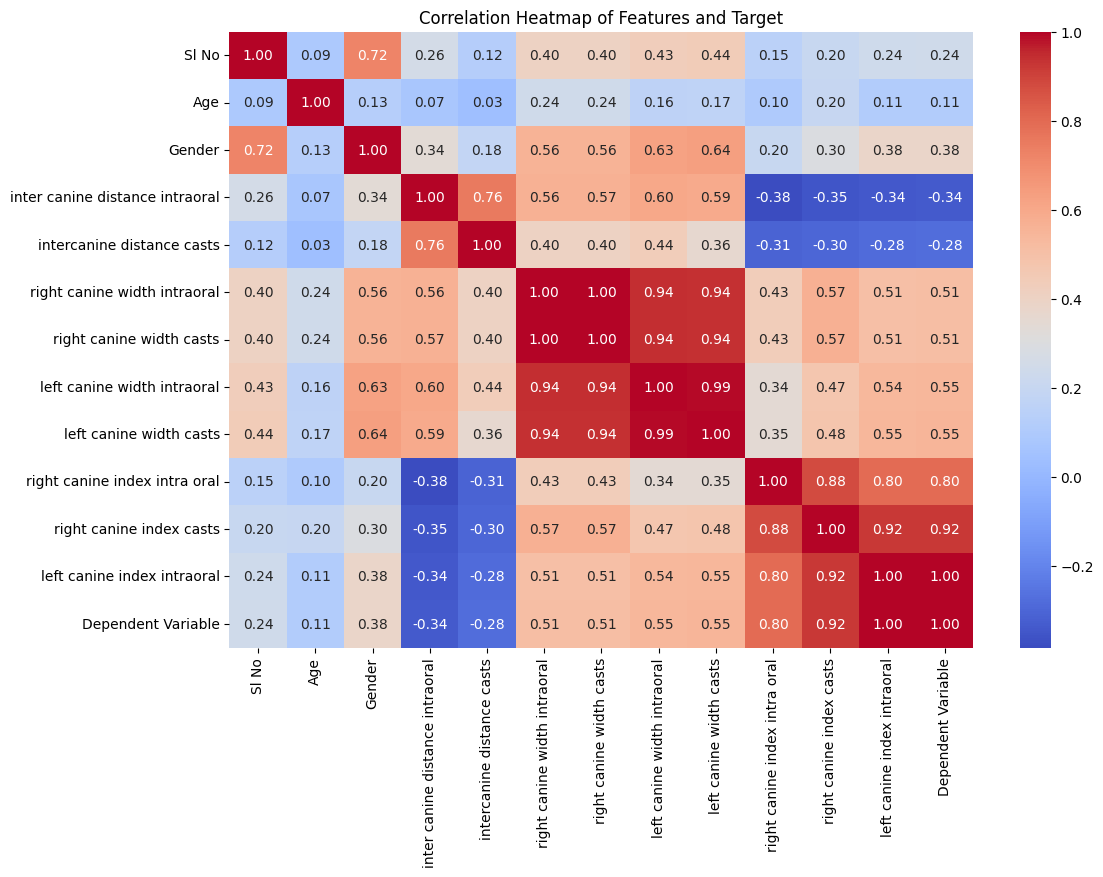

Updated Dataset Columns:
Index(['Gender', 'right canine width casts', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')
Dropped Features: ['right canine width casts', 'left canine width intraoral', 'left canine width casts', 'left canine index intraoral']
Updated Dataset Columns:
Index(['Sl No', 'Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine index intra oral', 'right canine index casts',
       'left canine index casts'],
      dtype='object')
Shape of X_train: (880, 12)
Shape of X_test: (220, 12)
Shape of Y_train: (880,)
Shape of Y_test: (220,)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv("Dentistry Dataset.csv")


# i) Handle Missing Values
# Drop 'Sample ID' column due to 100% missing values
data = data.drop(columns=['Sample ID'])

# ii) Encode Categorical Data
# Encode 'Gender' column using label encoding
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Display the cleaned dataset
print(data.head())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# iii) Split independent (X) and dependent (Y) variables
# Assuming the dependent variable is the last column
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # The last column as the dependent variable

# iv) Normalize the X variable
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split into training and testing sets (if needed)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Display shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Select the dependent variable (Y) and independent variables (X)
# Assuming the dependent variable is the last column
X = data.iloc[:, :-1]  # Independent variables (all except the last)
Y = data.iloc[:, -1]   # Dependent variable (the last column)

# Combine X and Y to calculate correlations
data_combined = pd.concat([X, Y.rename("Dependent Variable")], axis=1)

# Compute correlation matrix
correlation_matrix = data_combined.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features and Target")
plt.show()


# Drop unwanted variables
columns_to_drop = [
    'Age',
    'intercanine distance casts',
    'inter canine distance intraoral',
    'Sl No',
    'left canine width intraoral',
    'right canine width intraoral'
]

# Update the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Display the updated dataset
print("Updated Dataset Columns:")
print(data_cleaned.columns)


# Compute correlation matrix for independent variables
correlation_matrix = data.iloc[:, :-1].corr()

# Select upper triangle of correlation matrix to avoid duplicate pairs
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with high correlation (> 0.90)
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

# Drop highly correlated features
data_reduced = data.drop(columns=high_correlation_features)

# Display dropped features and updated dataset
print("Dropped Features:", high_correlation_features)
print("Updated Dataset Columns:")
print(data_reduced.columns)

from sklearn.model_selection import train_test_split

# Assuming the last column is the dependent variable (Y)
X = data.iloc[:, :-1]  # Independent variables
Y = data.iloc[:, -1]   # Dependent variable

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)



